# 2.5 Piston-cylinder: Isobaric- Isochoric process

## Problem statement: 
A piston-cylinder device contains steam initially at 200 C and 200 kPa. The steam is first cooled isobarically to saturated liquid, then isochorically until its pressure reaches 25 kPa.

(a) Calculate the specific heat transfer in the whole process

(b) Sketch the whole process on the P−vand T−v diagrams


## Solution strategy
Identify the States:
        State 1: Initial state - T1=200 C and P1=200kPa
        State 2: After isobaric cooling to saturated liquid at P2=200kPa
        State 3: After isochoric cooling with V3=V2 and P3=25kPa.

Sketch the Process on P-v and T-v Diagrams:
        The process from State 1 to State 2 is a horizontal line on the P-v diagram and a downward slope on the T-v diagram.
        The process from State 2 to State 3 is a vertical line downward on the P-v diagram and also a downward slope on the T-v diagram.

Calculate the Specific Heat Transfer:
    Using the first law for a closed system:
    Δu=q−w
    Where:
    Δu = Change in internal energy between states.
    q = Heat transfer.
    w = Work done.
        For the isobaric process (State 1 to State 2), w=P(V2−V1).
        For the isochoric process (State 2 to State 3), w=0.

Thus, the total heat transfer for the whole process is:
    q=Δu+w

Let's proceed with the code to sketch the diagrams and calculate the specific heat transfer:

## Solution for (a):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP

# Given data
T1 = 350 + 273.15  # Initial temperature in K
P1 = 1000e3  # Initial pressure in Pa
P2 = 1000e3  # Pressure after isobaric cooling in Pa
P3 = 25e3  # Final pressure after isochoric process in Pa

# State 1 properties
v1 = 1 / CP.PropsSI("D", "T", T1, "P", P1, "Water")
u1 = CP.PropsSI("U", "T", T1, "P", P1, "Water")

# State 2 properties
T2 = CP.PropsSI("T", "P", P2, "Q", 0, "Water")  # Saturated liquid
v2 = 1 / CP.PropsSI("D", "P", P2, "Q", 0.5, "Water")
u2 = CP.PropsSI("U", "P", P2, "Q", 0, "Water")

# State 3 properties (isochoric)
v3 = v2
T3 = CP.PropsSI("T", "D", 1 / v3, "P", P3, "Water")
u3 = CP.PropsSI("U", "D", 1 / v3, "P", P3, "Water")

# Calculate work and heat transfer
w_12 = P1 * (v2 - v1)  # Isobaric process
w_23 = 0  # Isochoric process
q_12 = (u2 - u1) + w_12
q_23 = u3 - u2  # Isochoric process so no work
q_total = (q_12 + q_23)/1e3

print(f"Specific heat transfer for the whole process: {q_total:.2f} kJ/kg")

Specific heat transfer for the whole process: -2754.35 kJ/kg


## Solution for (b)

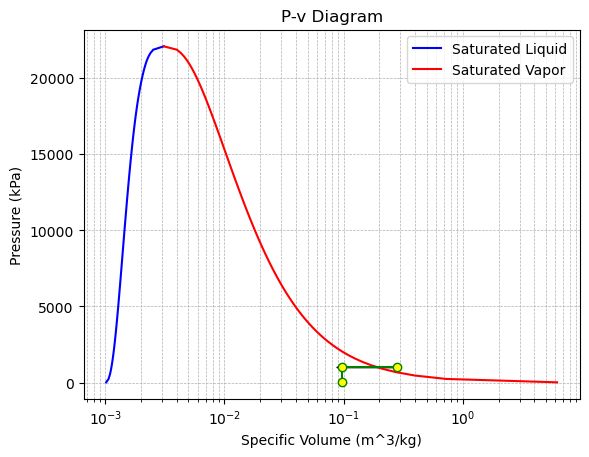

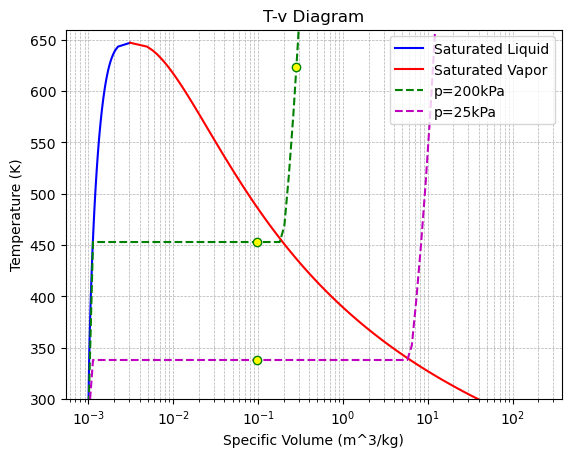

In [2]:

# Critical properties
P_critical = CP.PropsSI("Pcrit", "Water")
T_critical = CP.PropsSI("Tcrit", "Water")
T_triple = CP.PropsSI("Ttriple","water")
# P-v diagram with dome
plt.figure()
pressures = np.linspace(CP.PropsSI("P", "Q", 0, "T", T3, "Water"), P_critical, 100)
v_liquid = [1 / CP.PropsSI("D", "Q", 0, "P", P, "Water") for P in pressures]
v_vapor = [1 / CP.PropsSI("D", "Q", 1, "P", P, "Water") for P in pressures]
plt.plot(v_liquid, pressures / 1e3, "b-", label="Saturated Liquid")
plt.plot(v_vapor, pressures / 1e3, "r-", label="Saturated Vapor")
plt.plot(
    [v1, v2, v3],
    np.array([P1, P2, P3]) / 1e3,
    "o-",
    color="green",
    markerfacecolor="yellow",
)
plt.arrow(
    v1, P1 / 1e3, v2 - v1, 0, head_width=5, head_length=0.01, fc="black", ec="black"
)
plt.xscale("log")
plt.xlabel("Specific Volume (m^3/kg)")
plt.ylabel("Pressure (kPa)")
plt.title("P-v Diagram")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# T-v diagram with dome
plt.figure()
temperatures = np.linspace(T_triple, T_critical, 100)
v_liquid_T = [1 / CP.PropsSI("D", "Q", 0, "T", T, "Water") for T in temperatures]
v_vapor_T = [1 / CP.PropsSI("D", "Q", 1, "T", T, "Water") for T in temperatures]
plt.plot(v_liquid_T, temperatures, "b-", label="Saturated Liquid")
plt.plot(v_vapor_T, temperatures, "r-", label="Saturated Vapor")

# Isobaric lines for T-v plot
v_range = np.logspace(np.log10(min(v_liquid_T)), np.log10(max(v_vapor_T)), 100)
T_200kPa = [CP.PropsSI("T", "D", 1 / v, "P", P1, "Water") for v in v_range]
T_25kPa = [CP.PropsSI("T", "D", 1 / v, "P", 25e3, "Water") for v in v_range]
plt.plot(v_range, T_200kPa, "g--", label="p=200kPa")
plt.plot(v_range, T_25kPa, "m--", label="p=25kPa")

plt.plot([v1, v2, v3], [T1, T2, T3], "o", color="green", markerfacecolor="yellow")
# plt.arrow(v1, T1, v2-v1, T2-T1, head_width=0.01, head_length=10, fc='black', ec='black')
# plt.arrow(v2, T2, 0, T3-T2, head_width=0.01, head_length=10, fc='black', ec='black')
plt.xscale("log")
plt.xlabel("Specific Volume (m^3/kg)")
plt.ylabel("Temperature (K)")
plt.title("T-v Diagram")
plt.ylim([300, 660])
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
